In [10]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
from os.path import join as oj
from collections import defaultdict

from simulations_util import get_best_fit_line

In [19]:
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams["figure.figsize"] = [8, 6]
plt.rcParams['figure.facecolor'] = 'white'
cs = {
    'SAPS': 'black',
    'Tree': 'orange',
    'RF': "grey",
    "XGB" : "pink",
    "GAM" : "green"
}

label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [7]:
n_train = [100, 250, 500, 750, 1000, 1500]

## 1. Results for LSS

In [18]:
len(scores)

5

In [21]:
sim_name = "LSS"
(scores, error_bar) = pkl.load(open(oj('results/', "LSS", 'scores.pkl'), 'rb'))
best_fits = defaultdict(list)
for k in scores.keys():
    best_fits[k].append(get_best_fit_line(np.log(n_train), np.log(scores[k])))

In [22]:
best_fits

defaultdict(list,
            {'GAM': [[0.058119555922211456, -1.189349969595053]],
             'Tree': [[-0.0933543060235817, -0.1750024263594289]],
             'RF': [[-0.38223855357632097, 0.9500360214100221]],
             'SAPS': [[-1.4025656973995282, 6.370972017756195]],
             'XGB': [[-0.7091161074605438, 2.631412434607613]]})

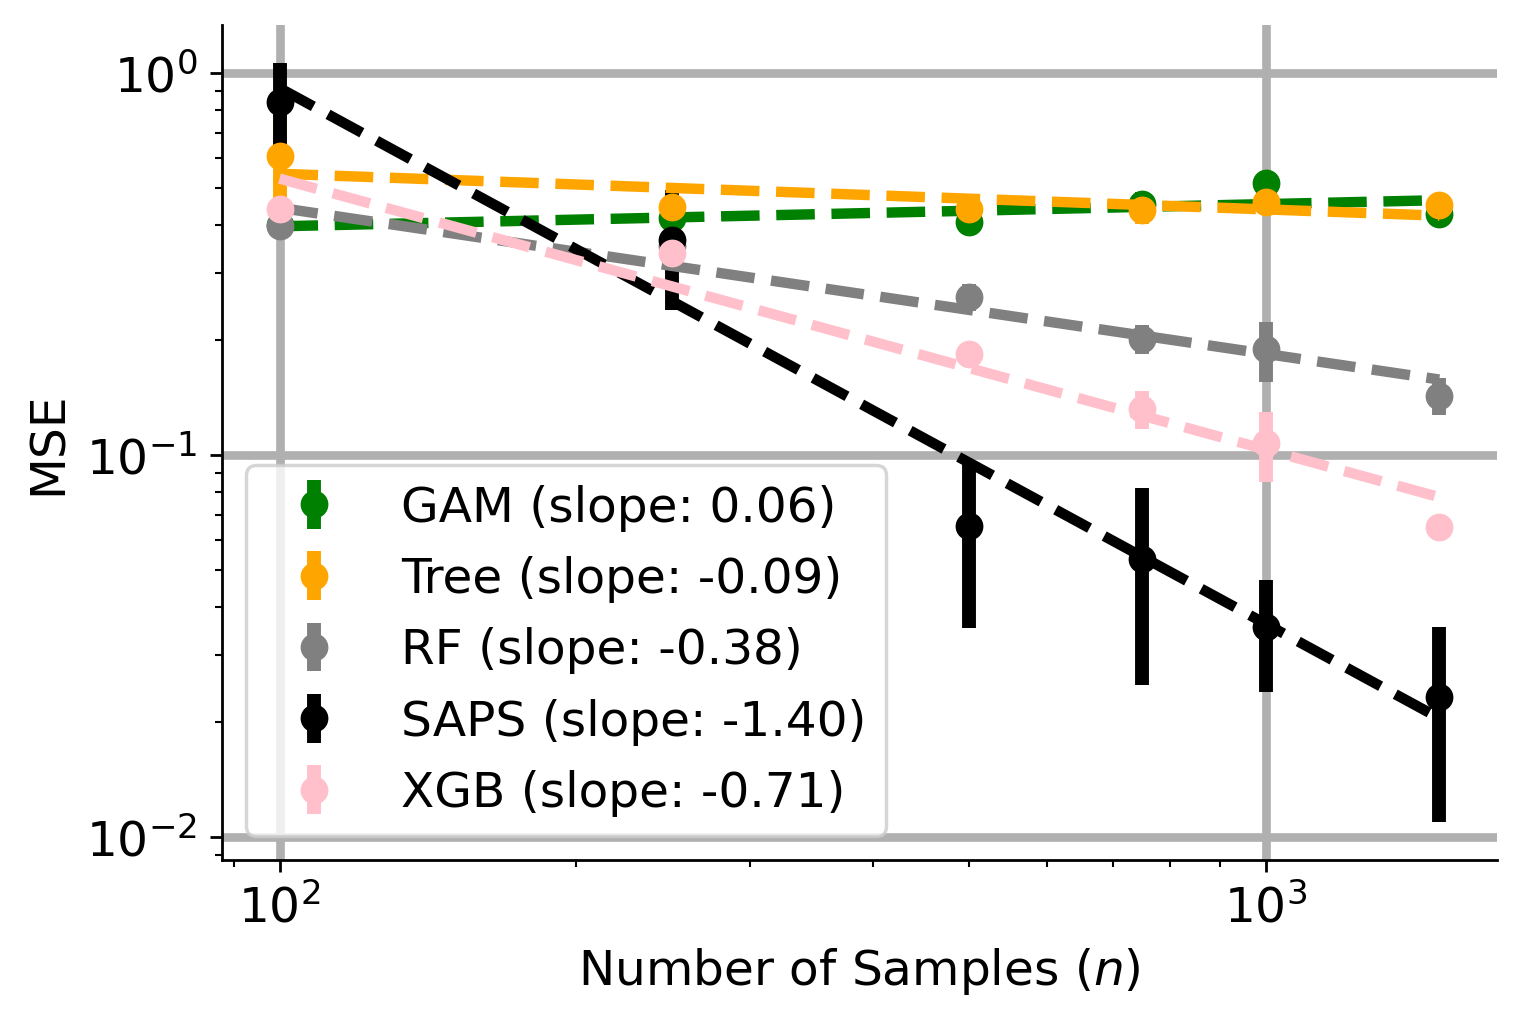

In [32]:
fig, axs = plt.subplots(1, 1, figsize = (6, 4))
axs = [axs]

for i, k in enumerate(scores.keys()):
    kwargs = dict(color=cs[k], ms=7, elinewidth=4, lw=3)
    slope = best_fits[k][0][0]
    axs[0].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][0][1]), linestyle = '--', **kwargs)
    axs[0].errorbar(n_train, scores[k], yerr=error_bar[k], fmt='o', label=k + f' (slope: {slope:.2f})', **kwargs)

for i in range(1):
    axs[i].legend(loc='best') #, labelcolor='linecolor')
    axs[i].set_xlabel('Number of Samples ($n$)') #, fontsize=25)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
#     axs[i].set_title(titles[i])
    axs[i].grid()
    axs[i].set_yticks([0.1, 0.2, 0.5, 1.0])
axs[0].set_ylabel('MSE')

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)
plt.yscale('log')
plt.xscale('log')
labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',r'$3 \times \mathregular{10^{0}}$']

# plt.yticks(ytick, labels)
#viz.savefig(f'err_rate_{num}')
plt.show()

## 2. Results for sum of polys

In [33]:
sim_name = "poly"
(scores, error_bar) = pkl.load(open(oj('results/', "poly", 'scores.pkl'), 'rb'))
best_fits = defaultdict(list)
for k in scores.keys():
    best_fits[k].append(get_best_fit_line(np.log(n_train), np.log(scores[k])))

In [34]:
best_fits

defaultdict(list,
            {'GAM': [[-0.2045633707031594, -1.6006044731824853]],
             'Tree': [[0.004532539509200184, -2.4848781364413925]],
             'RF': [[-0.29634496903482743, -1.3290562304075444]],
             'SAPS': [[-0.623758182101395, 0.7661832541027517]],
             'XGB': [[-0.480386750006879, -0.3613560249090327]]})

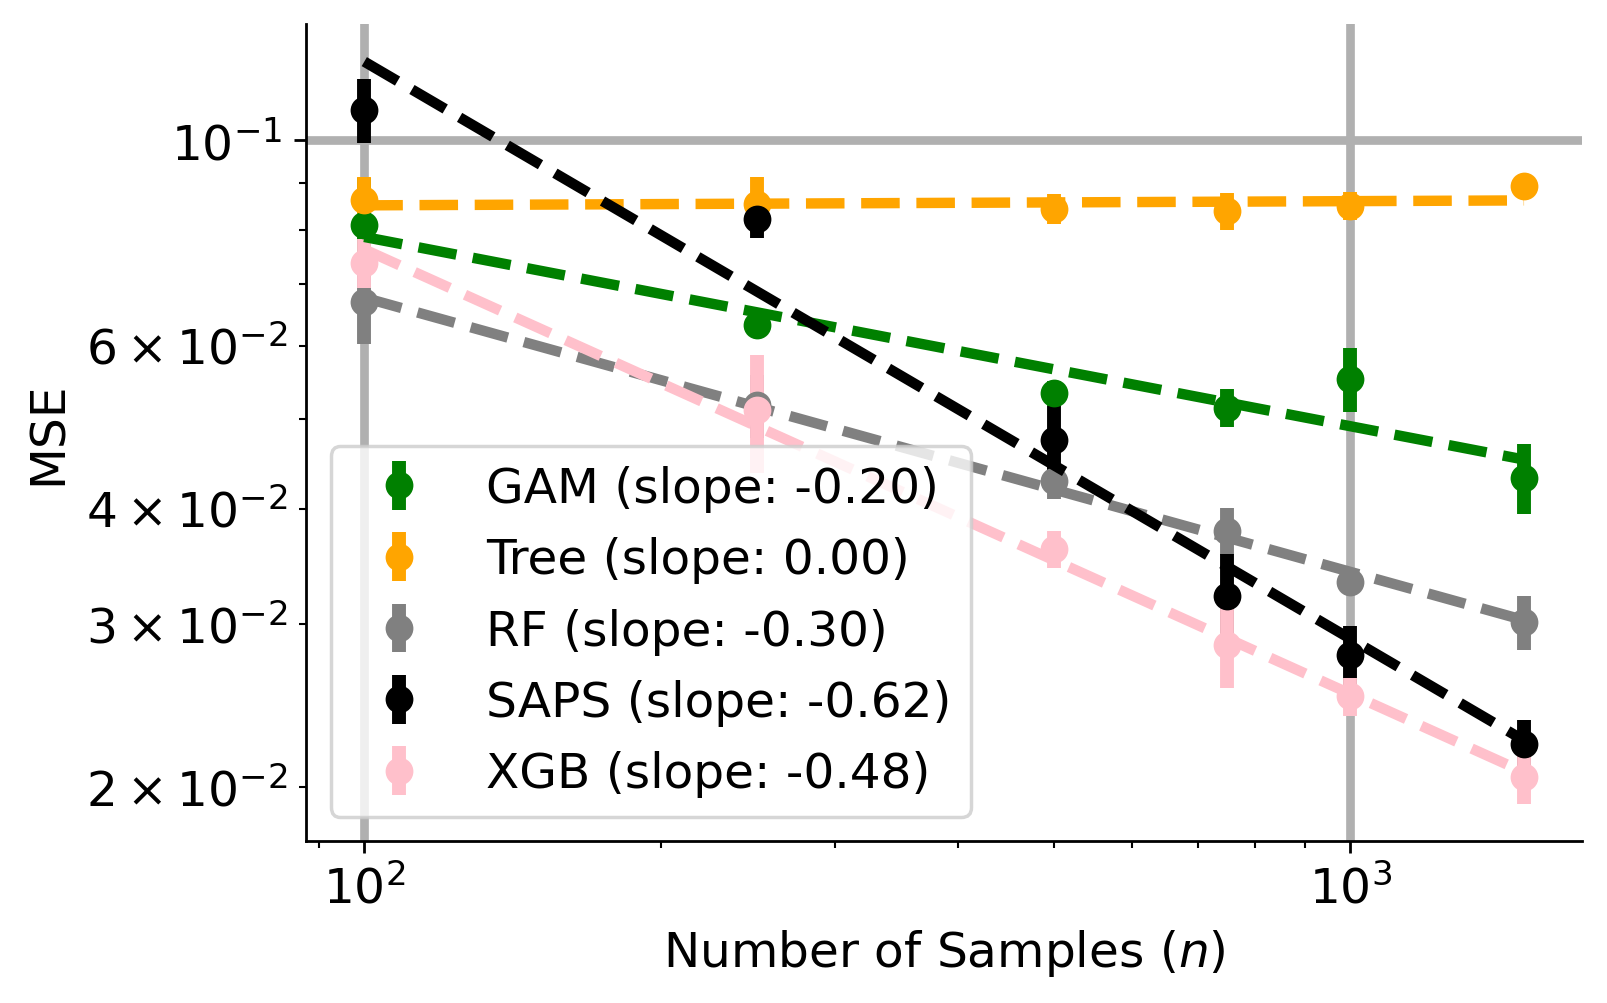

In [35]:
fig, axs = plt.subplots(1, 1, figsize = (6, 4))
axs = [axs]

for i, k in enumerate(scores.keys()):
    kwargs = dict(color=cs[k], ms=7, elinewidth=4, lw=3)
    slope = best_fits[k][0][0]
    axs[0].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][0][1]), linestyle = '--', **kwargs)
    axs[0].errorbar(n_train, scores[k], yerr=error_bar[k], fmt='o', label=k + f' (slope: {slope:.2f})', **kwargs)

for i in range(1):
    axs[i].legend(loc='best') #, labelcolor='linecolor')
    axs[i].set_xlabel('Number of Samples ($n$)') #, fontsize=25)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
#     axs[i].set_title(titles[i])
    axs[i].grid()
    axs[i].set_yticks([0.1, 0.2, 0.5, 1.0])
axs[0].set_ylabel('MSE')

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)
plt.yscale('log')
plt.xscale('log')
labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',r'$3 \times \mathregular{10^{0}}$']

# plt.yticks(ytick, labels)
#viz.savefig(f'err_rate_{num}')
plt.show()

## 3. Results for linear

In [36]:
sim_name = "linear"
(scores, error_bar) = pkl.load(open(oj('results/', sim_name, 'scores.pkl'), 'rb'))
best_fits = defaultdict(list)
for k in scores.keys():
    best_fits[k].append(get_best_fit_line(np.log(n_train), np.log(scores[k])))

In [37]:
best_fits

defaultdict(list,
            {'GAM': [[-1.8918473814160257, 9.42476208754075]],
             'Tree': [[-0.05431081937954523, 0.2674642153993934]],
             'RF': [[-0.2668212949482408, 0.8380378131628956]],
             'SAPS': [[-1.3292440503186191, 6.172266816848149]],
             'XGB': [[-0.4460957989573508, 1.759174933749543]]})

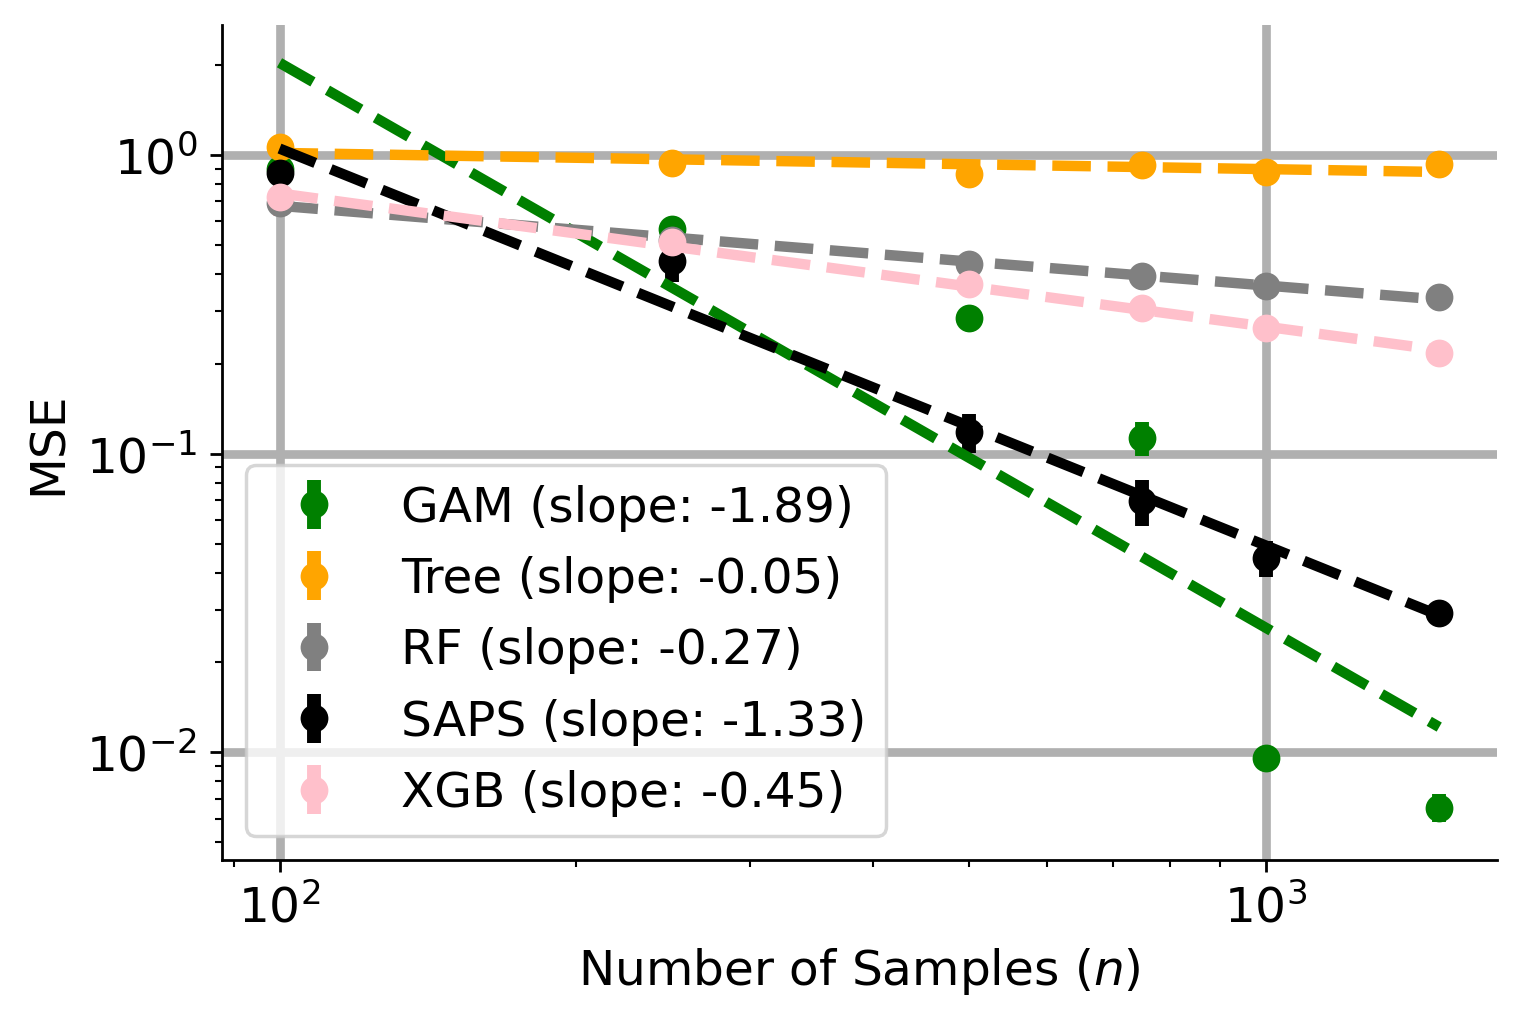

In [38]:
fig, axs = plt.subplots(1, 1, figsize = (6, 4))
axs = [axs]

for i, k in enumerate(scores.keys()):
    kwargs = dict(color=cs[k], ms=7, elinewidth=4, lw=3)
    slope = best_fits[k][0][0]
    axs[0].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][0][1]), linestyle = '--', **kwargs)
    axs[0].errorbar(n_train, scores[k], yerr=error_bar[k], fmt='o', label=k + f' (slope: {slope:.2f})', **kwargs)

for i in range(1):
    axs[i].legend(loc='best') #, labelcolor='linecolor')
    axs[i].set_xlabel('Number of Samples ($n$)') #, fontsize=25)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
#     axs[i].set_title(titles[i])
    axs[i].grid()
    axs[i].set_yticks([0.1, 0.2, 0.5, 1.0])
axs[0].set_ylabel('MSE')

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)
plt.yscale('log')
plt.xscale('log')
labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',r'$3 \times \mathregular{10^{0}}$']

# plt.yticks(ytick, labels)
#viz.savefig(f'err_rate_{num}')
plt.show()